In [62]:
# General imports
import json 
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np # linear algebra
import seaborn as sns
import pytz

# Sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans #The k-means algorithm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [63]:
df = pd.read_csv('data/data.csv')
df = df.drop(["Tijdstempel"] , axis=1)

In [64]:
df.columns = ['how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'digital_privacy_aware_score', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'age', 'gender', 'born', 'education', 'pet', 'device', 'student', 'source_income', 'income', 'living_situation', 'screen_time', 'social_media_activity', 'main_social_media']

In [65]:
df.head(3)

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,A friend sent it to me,Always online,Yes,No,8,Yes,VPN;Deleting cookies,Not sure,Sold,21,...,VWO,Cat,iPhone,Yes,Student loan,700,Living with parents,6,3.0,Tiktok
1,NaN,Always online,No,No,4,No,I dont,Not sure,Ads being sold,20,...,HAVO,Dog,Samsung smartphone,Yes,Student loan,500,Living with parents,8,4.0,Tiktok
2,A friend sent it to me,Digital native,Yes,Sometimes,7,Yes,VPN;Different accounts;Deleting cookies,Not sure,Getting in the wrong hands,22,...,HBO-Bachelor,Cat,iPhone,No,Job,2400,Renting a room,7,2.0,Reddit


In [66]:
df.describe(include='all')

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
count,40,41,41,41,41.000000,41,37,41,34,41.000000,...,41,41,41,41,41,41.000000,41,41.000000,40.000000,41
unique,3,5,2,3,NaN,3,21,3,33,NaN,...,9,2,5,2,6,NaN,4,NaN,NaN,7
top,A friend sent it to me,Always online,Yes,No,NaN,Yes,VPN;Deleting cookies,Not sure,Leaks,NaN,...,HBO-Bachelor,Cat,iPhone,No,Job,NaN,Living with parents,NaN,NaN,Tiktok
freq,18,16,24,28,NaN,17,4,20,2,NaN,...,15,22,17,30,28,NaN,17,NaN,NaN,12
mean,NaN,NaN,NaN,NaN,5.756098,NaN,NaN,NaN,NaN,22.780488,...,NaN,NaN,NaN,NaN,NaN,1930.487805,NaN,6.414634,2.050000,NaN
std,NaN,NaN,NaN,NaN,2.527652,NaN,NaN,NaN,NaN,2.464875,...,NaN,NaN,NaN,NaN,NaN,1018.876713,NaN,2.607447,0.985797,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,18.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,21.000000,...,NaN,NaN,NaN,NaN,NaN,900.000000,NaN,4.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,23.000000,...,NaN,NaN,NaN,NaN,NaN,2200.000000,NaN,7.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,24.000000,...,NaN,NaN,NaN,NaN,NaN,2600.000000,NaN,8.000000,3.000000,NaN


In [67]:
# create a dataframe with numerical values
df_numerical = df.copy()
# fill NaN values with 0
df_numerical = df_numerical.fillna(0)
# convert categorical values to numerical values
df_numerical['how_survey_across'] = df_numerical['how_survey_across'].astype('category').cat.codes
df_numerical['digital_skill_level'] = df_numerical['digital_skill_level'].astype('category').cat.codes
df_numerical['digital_privacy_aware'] = df_numerical['digital_privacy_aware'].astype('category').cat.codes
df_numerical['terms_conditions'] = df_numerical['terms_conditions'].astype('category').cat.codes
df_numerical['data_protection'] = df_numerical['data_protection'].astype('category').cat.codes
df_numerical['how_protection'] = df_numerical['how_protection'].astype('category').cat.codes
df_numerical['data_deletion'] = df_numerical['data_deletion'].astype('category').cat.codes
df_numerical['education'] = df_numerical['education'].astype('category').cat.codes
df_numerical['pet'] = df_numerical['pet'].astype('category').cat.codes
df_numerical['student'] = df_numerical['student'].astype('category').cat.codes
df_numerical['living_situation'] = df_numerical['living_situation'].astype('category').cat.codes
df_numerical['worst_case_scenario'] = df_numerical['worst_case_scenario'].astype('category').cat.codes
df_numerical.head(3)

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,1,0,1,0,8,2,14,1,21,21,...,6,0,iPhone,1,Student loan,700,0,6,3.0,Tiktok
1,0,0,0,0,4,0,8,1,1,20,...,0,1,Samsung smartphone,1,Student loan,500,0,8,4.0,Tiktok
2,1,2,1,1,7,2,16,1,5,22,...,1,0,iPhone,0,Job,2400,2,7,2.0,Reddit


In [68]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
how_survey_across,41.0,1.829268,0.919305,0.0,1.0,2.0,3.0,3.0
digital_skill_level,41.0,1.463415,1.433485,0.0,0.0,2.0,2.0,4.0
digital_privacy_aware,41.0,0.585366,0.498779,0.0,0.0,1.0,1.0,1.0
terms_conditions,41.0,0.365854,0.581210,0.0,0.0,0.0,1.0,2.0
digital_privacy_aware_score,41.0,5.756098,2.527652,1.0,4.0,6.0,7.0,10.0
data_protection,41.0,1.097561,0.860374,0.0,0.0,1.0,2.0,2.0
how_protection,41.0,10.317073,6.306501,0.0,5.0,12.0,16.0,21.0
data_deletion,41.0,0.926829,0.720772,0.0,0.0,1.0,1.0,2.0
worst_case_scenario,41.0,14.121951,10.812481,0.0,4.0,14.0,23.0,33.0
age,41.0,22.780488,2.464875,18.0,21.0,23.0,24.0,30.0


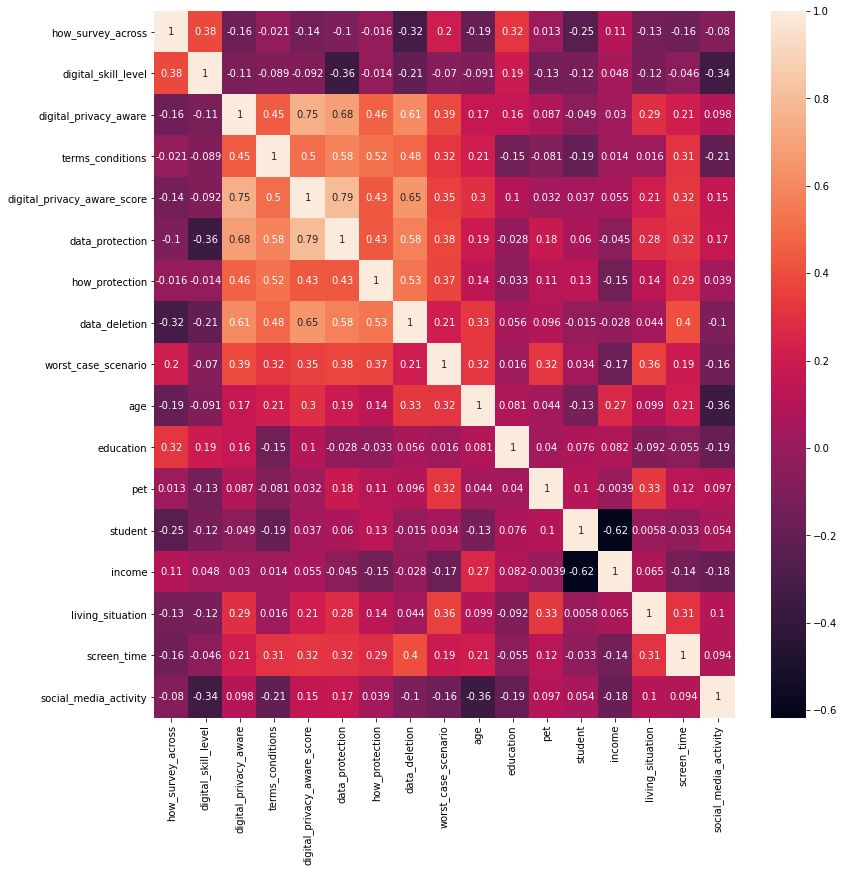

In [69]:
correlation_mat = df_numerical.corr()
correlation_mat
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlation_mat, annot = True, xticklabels=correlation_mat.columns, yticklabels=correlation_mat.columns, ax=ax)
plt.show()

In [70]:
df.isnull().sum()
# fill null values with 0
df= df.fillna(0)

We must confirm that our dataset has no missing values.

We can write an Assert statement to verify this.

We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present.

This gives us confidence that our code is running properly.

Assert statement will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

Asserts

assert 1 == 1 (return Nothing if the value is True)

assert 1 == 2 (return AssertionError if the value is False)

In [71]:
assert pd.notnull(df).all().all()

The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.

All the values are greater than or equal to zero excluding character values.

In [72]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 17 categorical variables

The categorical variables are :

 ['how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'gender', 'born', 'education', 'pet', 'device', 'student', 'source_income', 'living_situation', 'main_social_media']


In [73]:
df[categorical].head()

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,data_protection,how_protection,data_deletion,worst_case_scenario,gender,born,education,pet,device,student,source_income,living_situation,main_social_media
0,A friend sent it to me,Always online,Yes,No,Yes,VPN;Deleting cookies,Not sure,Sold,Male,Utrecht,VWO,Cat,iPhone,Yes,Student loan,Living with parents,Tiktok
1,0,Always online,No,No,No,I dont,Not sure,Ads being sold,Female,Noord-Holland,HAVO,Dog,Samsung smartphone,Yes,Student loan,Living with parents,Tiktok
2,A friend sent it to me,Digital native,Yes,Sometimes,Yes,VPN;Different accounts;Deleting cookies,Not sure,Getting in the wrong hands,Male,Noord-Holland,HBO-Bachelor,Cat,iPhone,No,Job,Renting a room,Reddit
3,Whatsapp,Always online,No,No,Not sure,Deleting cookies;Sharing accounts;Using servic...,Not sure,Facebook,Male,Utrecht,WO-Master,Cat,Other Android Phone,No,Job,Living with parents,Twitter
4,Whatsapp,Never online,Yes,Sometimes,Yes,VPN;Different accounts;Deleting cookies;Limite...,Not sure,My data getting in the hands of the chinese go...,Male,Utrecht,WO-Bachelor,Dog,iPhone,Yes,Student loan,Living with parents,Reddit


### Summary of categorical variables
There are 17 categorical variables in the dataset.

The categorical variables are given by 'how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'gender', 'born', 'education', 'pet', 'device', 'student', 'source_income', 'living_situation', 'main_social_media'.

income is the target variable

In [74]:
df['income'].isnull().sum()

0

Check if there are missing values, which there are not.

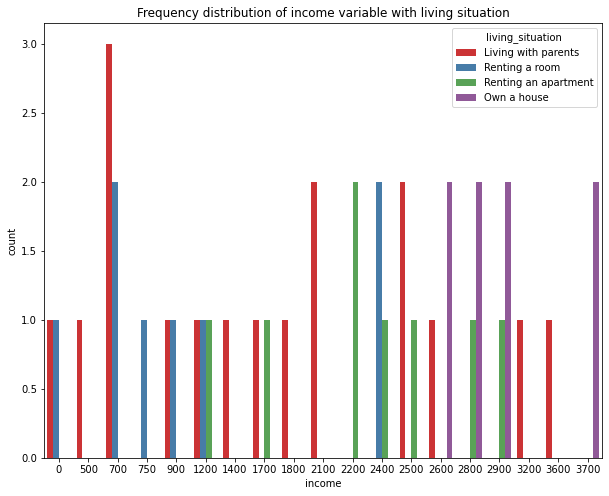

In [75]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="living_situation", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable with living situation")
plt.show()

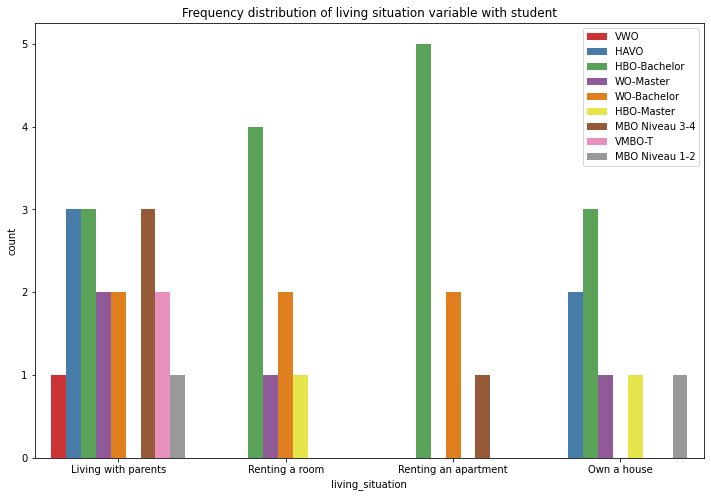

In [76]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="living_situation", hue="education", data=df, palette="Set1")
ax.set_title("Frequency distribution of living situation variable with student")
ax.legend(loc='upper right')
plt.show()

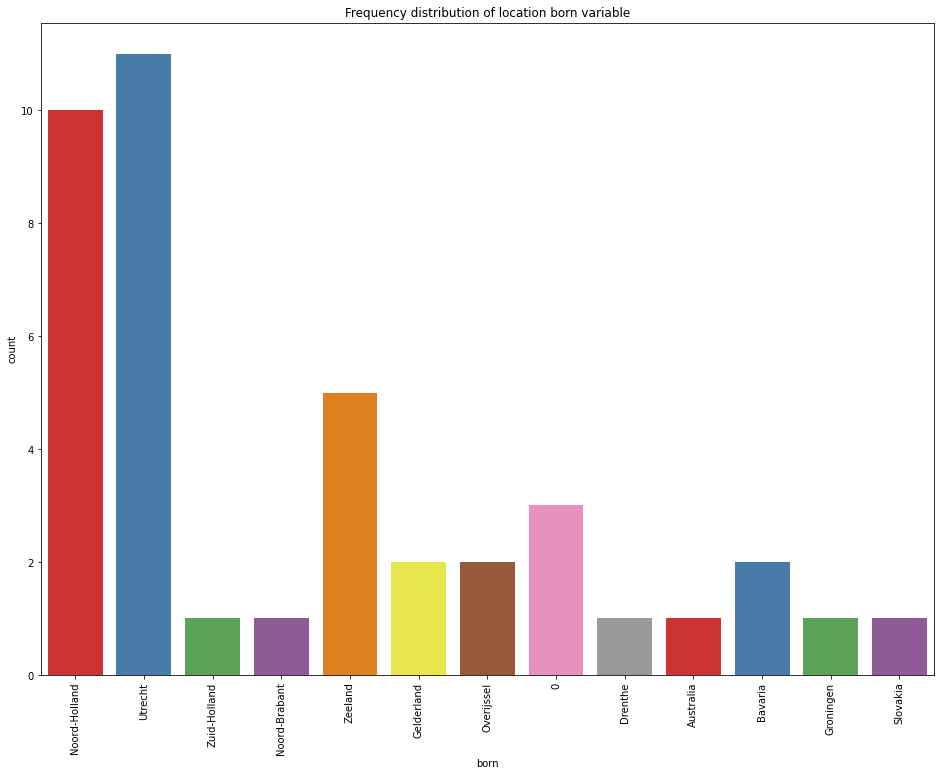

In [77]:
# visualize frequency distribution of `native_country` variable

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="born", data=df, palette="Set1")
ax.set_title("Frequency distribution of location born variable")
ax.set_xticklabels(df.born.value_counts().index, rotation=90)
plt.show()

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


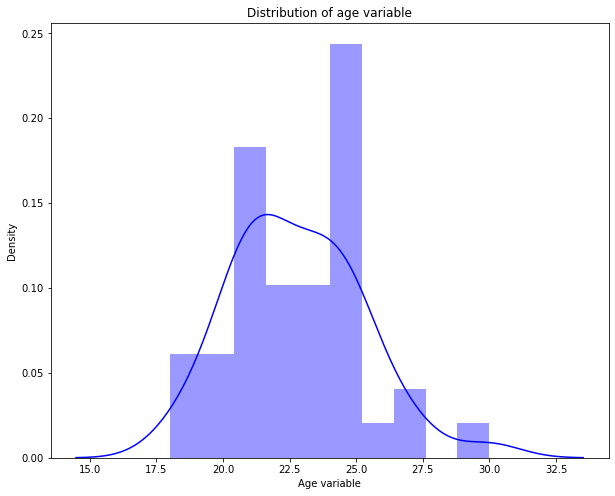

In [78]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

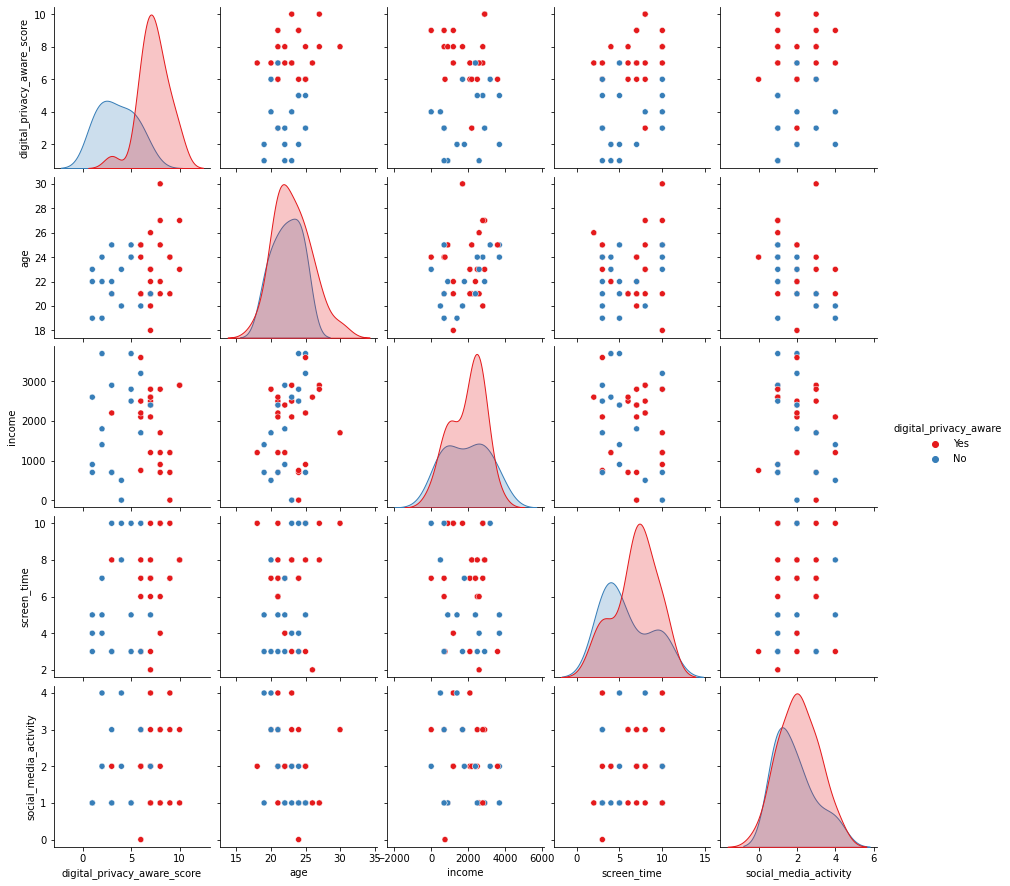

In [79]:
sns.pairplot(df, hue="digital_privacy_aware", palette="Set1")
plt.show()

In [80]:
X = df.drop(['education'], axis=1)

y = df['education']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [82]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((28, 21), (13, 21))

In [83]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['how_survey_across',
 'digital_skill_level',
 'digital_privacy_aware',
 'terms_conditions',
 'data_protection',
 'how_protection',
 'data_deletion',
 'worst_case_scenario',
 'gender',
 'born',
 'pet',
 'device',
 'student',
 'source_income',
 'living_situation',
 'main_social_media']

In [84]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['digital_privacy_aware_score',
 'age',
 'income',
 'screen_time',
 'social_media_activity']

In [85]:

X_train[categorical].isnull().mean()

how_survey_across        0.0
digital_skill_level      0.0
digital_privacy_aware    0.0
terms_conditions         0.0
data_protection          0.0
how_protection           0.0
data_deletion            0.0
worst_case_scenario      0.0
gender                   0.0
born                     0.0
pet                      0.0
device                   0.0
student                  0.0
source_income            0.0
living_situation         0.0
main_social_media        0.0
dtype: float64

In [86]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [87]:
X_train[categorical].isnull().sum()

how_survey_across        0
digital_skill_level      0
digital_privacy_aware    0
terms_conditions         0
data_protection          0
how_protection           0
data_deletion            0
worst_case_scenario      0
gender                   0
born                     0
pet                      0
device                   0
student                  0
source_income            0
living_situation         0
main_social_media        0
dtype: int64

In [88]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

how_survey_across        0
digital_skill_level      0
digital_privacy_aware    0
terms_conditions         0
data_protection          0
how_protection           0
data_deletion            0
worst_case_scenario      0
gender                   0
born                     0
pet                      0
device                   0
student                  0
source_income            0
living_situation         0
main_social_media        0
dtype: int64

In [89]:
X_train.isnull().sum()

how_survey_across              0
digital_skill_level            0
digital_privacy_aware          0
terms_conditions               0
digital_privacy_aware_score    0
data_protection                0
how_protection                 0
data_deletion                  0
worst_case_scenario            0
age                            0
gender                         0
born                           0
pet                            0
device                         0
student                        0
source_income                  0
income                         0
living_situation               0
screen_time                    0
social_media_activity          0
main_social_media              0
dtype: int64

In [90]:
X_test.isnull().sum()

how_survey_across              0
digital_skill_level            0
digital_privacy_aware          0
terms_conditions               0
digital_privacy_aware_score    0
data_protection                0
how_protection                 0
data_deletion                  0
worst_case_scenario            0
age                            0
gender                         0
born                           0
pet                            0
device                         0
student                        0
source_income                  0
income                         0
living_situation               0
screen_time                    0
social_media_activity          0
main_social_media              0
dtype: int64

In [91]:
# preview categorical variables in X_train

X_train[categorical].head()

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,data_protection,how_protection,data_deletion,worst_case_scenario,gender,born,pet,device,student,source_income,living_situation,main_social_media
2,A friend sent it to me,Digital native,Yes,Sometimes,Yes,VPN;Different accounts;Deleting cookies,Not sure,Getting in the wrong hands,Male,Noord-Holland,Cat,iPhone,No,Job,Renting a room,Reddit
40,A friend sent it to me,Always online,Yes,Sometimes,Yes,VPN;Deleting cookies;Limited social media,Yes,identiteitsfraude,Male,Noord-Holland,Dog,Windows PC,No,Job,Own a house,other
18,A friend sent it to me,Always online,Yes,No,Not sure,0,No,Personal information getting stolen . Or my ba...,Female,Noord-Holland,Cat,Samsung smartphone,No,Job,Renting an apartment,Instagram
15,A friend sent it to me,Always online,Yes,No,Yes,VPN;Deleting cookies,Yes,fall into the wrong hands,Male,Noord-Holland,Dog,iPhone,No,Job,Renting an apartment,Instagram
22,Whatsapp,Digibeet,No,No,No,Using services without an account,No,being hacked,Male,Utrecht,Dog,Apple PC,No,Job,Own a house,Facebook


In [92]:
# import category encoders

import category_encoders as ce

In [93]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'gender', 'born', 'pet', 'device', 'student', 'source_income', 'living_situation', 'main_social_media'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [94]:
X_train.shape

(28, 104)

In [95]:
X_test.head()

,how_survey_across_1,how_survey_across_2,how_survey_across_3,how_survey_across_4,digital_skill_level_1,digital_skill_level_2,digital_skill_level_3,digital_skill_level_4,digital_privacy_aware_1,digital_privacy_aware_2,...,living_situation_4,screen_time,social_media_activity,main_social_media_1,main_social_media_2,main_social_media_3,main_social_media_4,main_social_media_5,main_social_media_6,main_social_media_7
25,0,0,1,0,1,0,0,0,1,0,...,0,7,3.0,0,0,1,0,0,0,0
35,1,0,0,0,0,1,0,0,0,1,...,0,3,3.0,0,0,0,0,1,0,0
29,1,0,0,0,1,0,0,0,1,0,...,1,3,2.0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,7,1.0,1,0,0,0,0,0,0
10,1,0,0,0,0,0,1,0,0,1,...,0,4,2.0,0,0,0,0,0,1,0


In [96]:
X_test.shape

(13, 104)

In [97]:
cols = X_train.columns

In [98]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [99]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [100]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [101]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.3077


/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [102]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with 100 decision-trees : 0.3077


/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [103]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=0)

In [104]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

digital_privacy_aware_score    0.057585
born_2                         0.045787
income                         0.045214
age                            0.041968
screen_time                    0.035441
                                 ...   
worst_case_scenario_1          0.000000
worst_case_scenario_4          0.000000
worst_case_scenario_11         0.000000
how_protection_6               0.000000
born_9                         0.000000
Length: 104, dtype: float64

In [105]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 1 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 0]
 [0 2 0 0 0 0 0 0 0]]


In [106]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

ValueError: Shape of passed values is (9, 9), indices imply (2, 2)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Cat       0.60      0.33      0.43         9
         Dog       0.25      0.50      0.33         4

    accuracy                           0.38        13
   macro avg       0.42      0.42      0.38        13
weighted avg       0.49      0.38      0.40        13



### Input prototype

In [107]:
df.columns

Index(['how_survey_across', 'digital_skill_level', 'digital_privacy_aware',
       'terms_conditions', 'digital_privacy_aware_score', 'data_protection',
       'how_protection', 'data_deletion', 'worst_case_scenario', 'age',
       'gender', 'born', 'education', 'pet', 'device', 'student',
       'source_income', 'income', 'living_situation', 'screen_time',
       'social_media_activity', 'main_social_media'],
      dtype='object')

In [114]:
age = input("Enter your age: ")
gender = input("Enter your gender: ")
privacy_score = input("Enter your privacy score: ")
data_delete = input("Enter your data delete: ")
pet = input("Enter your pet: ")
social_media = input("Enter your social media: ")

features = {
            'how_survey_across': '0.0',
            'digital_skill_level': '0.0',
            'digital_privacy_aware': privacy_score,
            'terms_conditions': '0.0',
            'data_protection': '0.0',
            'how_protection': '0.0',
            'data_deletion': data_delete,
            'worst_case_scenario': '0.0',
            "age": age,
            "gender": gender,
            "born": '0.0',
            "education": '0.0',
            "pet": pet,
            "device": '0.0',
            "student": '0.0',
            "source_income": '0.0',
            "income": '0.0',
            "living_situation": '0.0',
            'screen_time': '0.0',
            'social_media_activity': '0.0',
            "main_social_media": social_media
}

features = pd.DataFrame(features, index=[0])
features

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,data_protection,how_protection,data_deletion,worst_case_scenario,age,gender,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,0.0,0.0,7,0.0,0.0,0.0,yes,0.0,19,male,...,0.0,dog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tiktok


In [115]:
# encode categorical variables with one-hot encoding
features = encoder.transform(features)
features.shape
features = scaler.transform(features)
features = pd.DataFrame(features, columns=[cols])
features.shape

clf.predict(features)

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- education
Feature names seen at fit time, yet now missing:
- digital_privacy_aware_score

  warnings.warn(message, FutureWarning)
/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['HBO-Bachelor'], dtype=object)